# 1.1. Flask 에러 처리

### **`Error Handling`**

- **errorhandler** 를 활용하여 **HTTP** 오류 코드가 반환되는 페이지를 정의할 수 있다.
    - 이 때, **return** 의 두 번째 **parameter** 로 **status code** 를 명시해주지 않으면 **200 OK** 로 인지

In [ ]:
from flask import Flask 
import requests

app = Flask(__name__)   

@app.errorhandler(404)
def page_not_found(error):
    return "<h1>404 Error</h1>", 404

@app.route("/google")
def get_google():
    response = requests.get("http://www.google.co.kr")
    return response.text 

if __name__ == "__main__":
    app.run(host="0.0.0.0", port="8080")

# 1.2. Flask 로그 처리

### **`Logging`**

- 서버는 24시간 동작하기 때문에 발생한 문제들을 파악하기 위해 **logging** 을 사용하여야 한다.
- 사용자 모니터링, 해킹 확인 등 다양한 문제들에 대해 **logging** 을 사용할 수 있다.

- 이를 위해 **Python** 에서는 로그를 다루는 **logging** 라이브러리를 제공하고 있다.
- 이렇게 작성된 각각의 **logging** 정보들은 레벨을 가지고 있으며,
- **log** 의 레벨에 따라 출력을 제한할 수 있다.
    - **DEBUG > INFO > WARNING > ERROR > CRITICAL**
<br>
<br>
- **log** 들은 일반적으로 특정 **log file** 에 저장된다.

In [ ]:
import logging

logging.basicConfig(filename='test.log', level=logging.ERROR)

logging.debug("debug")        # DEBUG:root:debug
logging.info("info")          # INFO:root:info
logging.warning("warning")    # WARNING:root:warning
logging.error("error")        # ERROR:root:error
logging.critical("critical")  # CRITICAL:root:critical

- **basicConfig** 에서 **log file** 의 이름과 출력할 **log** 의 레벨을 명시할 수 있다.
- **log** 레벨별 함수를 사용하여 메시지를 파일에 저장해줄 수 있다.

### **`Logging in Flask`**

- **logging** 라이브러리를 활용하여 Flask 에서 **logging** 기능을 사용할 수 있다. **(Flask logging 관련 함수 + logging 라이브러리)**
<br>
<br>
- 주요 **logging Handler**
    - **FileHandler**: 파일로 로그를 저장
    - **RotatingFileHandler**: 파일로 로그를 저장하되, 파일이 정해진 사이즈를 넘어가면 새로운 파일로 생성
        - maxBytes - 파일 사이즈
        - backupCount - 파일 개수
        - 전체 파일 다 쓰면, 처음부터 작성
    - **NTEventLogHandler**: 윈도우 시스템 로그로 저장
    - **SysLogHandler**: Unix 계열 시스템의 syslog 로 저장

In [ ]:
from flask import Flask

app = Flask(__name__)

app.debug = False

if not app.debug:
    import logging
    from logging.handlers import RotatingFileHandler
    file_handler = RotatingFileHandler('dave_server.log', maxBytes=2000, backupCount=10) 
    file_handler.setLevel(logging.WARNING)
    app.logger.addHandler(file_handler)

- **Production** 환경일 경우, **logger** 를 세팅하고 추가해준다.
- 세팅이 완료된 **logger** 는 **`app.logger.addHandler()`** 로 추가해주어야만 **app.logger** 로 사용이 가능하다.

In [ ]:
@app.errorhandler(404)
def page_not_found(error):
    app.logger.error(error)
    return "<h1>404 Error</h1>", 404

if __name__ == "__main__":
    app.run(host="0.0.0.0", port="8080")

- **app.logger** 는 앞서 추가해준 **RotatingFileHandler** 이다.
- 따라서, **`app.logger.error(error)`** 는 **RotatingFileHandler** 에 **error** 레벨의 로그를 작성하겠다는 의미이다.
- 이 때, 괄호 안에 **parameter** 는 함수에서 받은 **error** 로, **error msg** 자체를 로그 내용으로 사용하게 된다.
- 따라서 괄호 안의 **parameter** 는 커스터마이징이 가능하다.

# 1.3. Flask Request Hook

- 주요 **Decorator**
    - **before_first_request**: app 구동 이후 가장 먼저 들어오는 **HTTP Request** 에서만 실행
    <br>
    <br>
    - **before_request**: **HTTP Request** 가 발생할 때마다 실행
        - **before_first_request** 와 **before_request** 는 **parameter** 전달 불가
    <br>
    <br>
    - **after_request**: **HTTP Request** 의 처리가 종료된 후, 다시 브라우저에 응답하기 전에 실행
        - **HTTP Response** 를 리턴하여야 한다.

In [ ]:
from flask import Flask

app = Flask(__name__)


@app.before_first_request
def before_first_request():
    print("flask 실행 후 첫 요청 때만 실행")


@app.before_request
def before_request():
    print("HTTP 요청이 들어올 때마다 실행")


@app.after_request
def after_request(response):
    print("HTTP 요청 처리가 끝나고 브라우저에 응답하기 전에 실행")
    return response


@app.route("/hello")
def hello():
    print('hello')
    return "<h1>Hello Flask!</h1>"


if __name__ == "__main__":
    app.run(host="0.0.0.0", port="8080")

- **after_request** 의 경우, 함수에서 **response** 를 받아 반환해주는 모습을 확인할 수 있다.

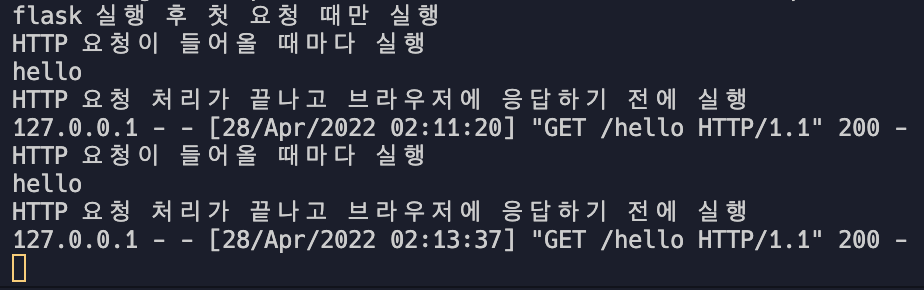

- 위는 두 번의 **HTTP Request** 를 전송 한 뒤의 터미널 화면이다.
- **route** 에 대한 **`print('hello')`** 구문이 처리 된 후, **Response** 가 전달되기 전에 **after_request** 가 실행되었다.
- **after_request** 가 처리된 후, **Response** 가 브라우저에게로 전달되었고, **200 OK** 로그가 발생한 것을 확인할 수 있다.
- 또한, 두 번째 **HTTP Request** 에서는 **before_first_request** 가 작동하지 않았음을 확인할 수 있다.